In [40]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 


In [2]:
df = pd.read_csv('Csvs/WideReleasesCount.csv')
df2 = pd.read_csv('Csvs/AnnualTicketSales.csv')


In [9]:
df.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN


In [10]:
df2.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [11]:
x = df['TOTAL MAJOR 6']
y = df2['TICKETS SOLD']

<AxesSubplot:>

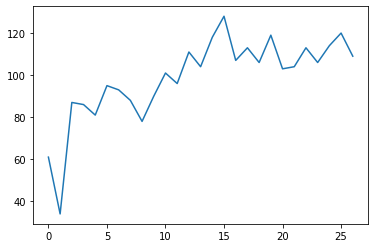

In [16]:
x.plot()

In [17]:
y2=y.to_numpy()

In [18]:
auxiliar = []

for i in y2:
    y3 = i.split(',')
    y4 = "".join(y3)
    auxiliar.append(int(y4))

print(auxiliar)


[423774881, 223638958, 1228541629, 1311536128, 1225639761, 1302556378, 1323356776, 1257402920, 1339168926, 1380921942, 1282915168, 1328549021, 1418567388, 1358042073, 1420036680, 1398738283, 1372980280, 1495651298, 1524589620, 1575756527, 1465874205, 1397460079, 1444664086, 1443832471, 1357349648, 1305221290, 1221705907]


<AxesSubplot:>

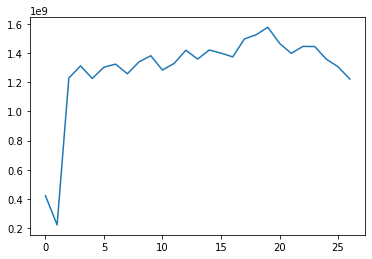

In [19]:
y = pd.Series(auxiliar)
y.plot()

In [21]:
df3 = pd.DataFrame(x)
df3['total_sales'] = y
df3

,TOTAL MAJOR 6,total_sales
0,61,423774881
1,34,223638958
2,87,1228541629
3,86,1311536128
4,81,1225639761
5,95,1302556378
6,93,1323356776
7,88,1257402920
8,78,1339168926
9,90,1380921942


In [22]:
df3.tail()

,TOTAL MAJOR 6,total_sales
22,113,1444664086
23,106,1443832471
24,114,1357349648
25,120,1305221290
26,109,1221705907


In [41]:
reg_1 = smf.ols("y ~ x", data = df3).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           7.70e-08
Time:                        21:32:34   Log-Likelihood:                -548.39
No. Observations:                  27   AIC:                             1101.
Df Residuals:                      25   BIC:                             1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.865e+07   1.66e+08      0.413      0.6

In [33]:
reg_1.resid

0    -3.996487e+08
1    -2.657050e+08
2     8.341184e+07
3     1.787797e+08
4     1.547499e+08
5     5.844006e+07
6     1.039871e+08
7     9.989982e+07
8     3.053990e+08
9     1.986722e+08
10   -3.544105e+07
11    7.205938e+07
12   -2.352200e+07
13    2.565902e+06
14   -1.086659e+08
15   -2.536975e+08
16   -1.961584e+07
17    2.881528e+07
18    1.443668e+08
19    3.468061e+07
20    1.227714e+08
21    4.198391e+07
22   -2.217193e+07
23    6.360967e+07
24   -1.218597e+08
25   -2.482279e+08
26   -1.956368e+08
dtype: float64

<AxesSubplot:>

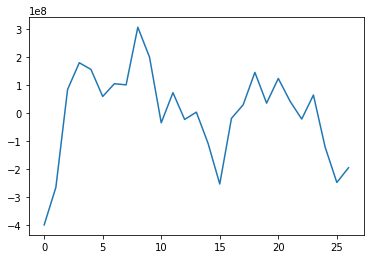

In [34]:
u = reg_1.resid
u.plot()

<AxesSubplot:ylabel='Density'>

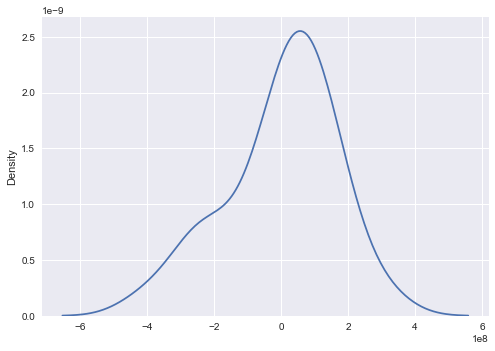

In [42]:
sns.kdeplot(u)

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL MAJOR 6'>

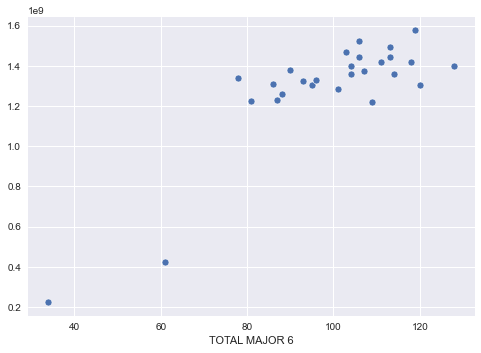

In [36]:

plt.style.use('seaborn')
sns.scatterplot(x,y)

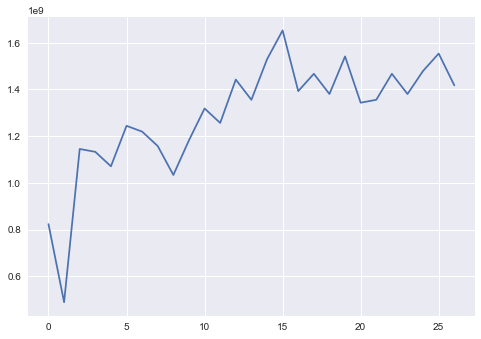

In [43]:
y_t = reg_1.predict()
plt.plot(y_t)

<AxesSubplot:>

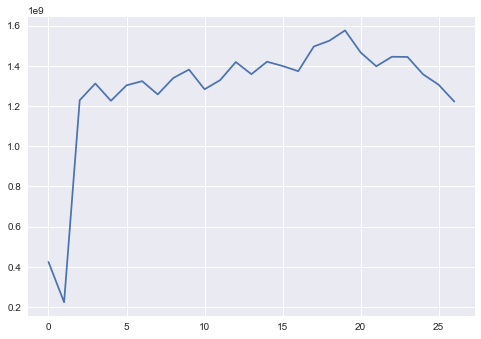

In [44]:
y.plot()

regresion multiple

<AxesSubplot:>

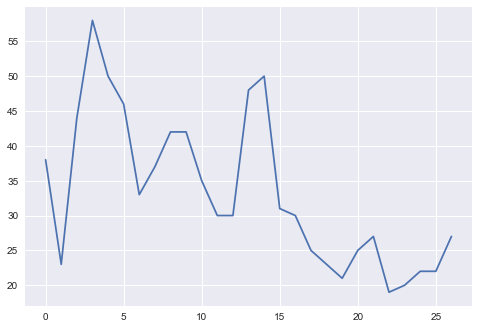

In [45]:
x2 = df['TOTAL OTHER STUDIOS']
x2.plot()

coef = beta de cada variable
R-squared = que tan bien se ajusta el modelo (entre mas alta mejor)

p>|t| = p-value debe ser menor a 0.05 para que la variable sea significativa
f-statistic = debe ser menor a 0.05 para que las variables en conjunto sean significativas

In [46]:
reg_2 = smf.ols("y ~ x + x2", data = df3).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     31.41
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.99e-07
Time:                        21:33:21   Log-Likelihood:                -546.91
No. Observations:                  27   AIC:                             1100.
Df Residuals:                      24   BIC:                             1104.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.765e+08   2.18e+08     -0.810      0.4

Residuos

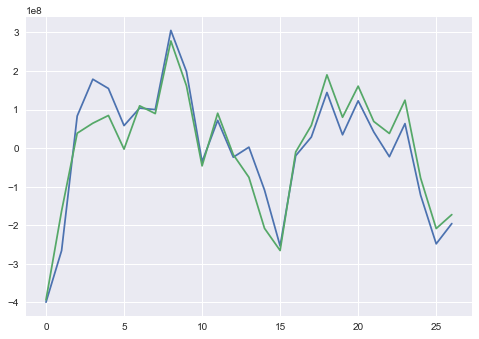

In [47]:
u2 = reg_2.resid
plt.plot(u)
plt.plot(u2) #verde
plt.show()

<AxesSubplot:ylabel='Density'>

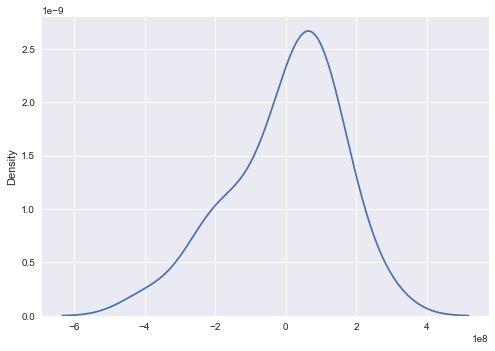

In [49]:
sns.kdeplot(u2)

ajuste

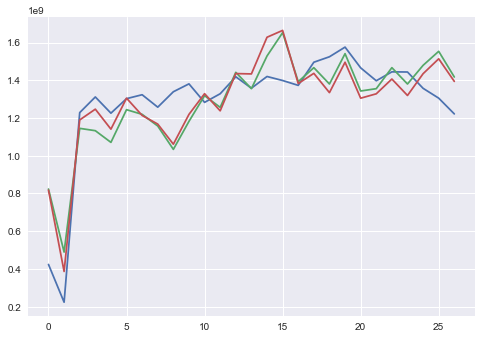

In [50]:
y_t2 = reg_2.predict()
plt.plot(y)
plt.plot(y_t)
plt.plot(y_t2)

valor predecido

$y_{t} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... +\beta_{n}x_{n}+ u_{t}$

In [51]:
x2

0     38
1     23
2     44
3     58
4     50
5     46
6     33
7     37
8     42
9     42
10    35
11    30
12    30
13    48
14    50
15    31
16    30
17    25
18    23
19    21
20    25
21    27
22    19
23    20
24    22
25    22
26    27
Name: TOTAL OTHER STUDIOS, dtype: int64

In [52]:
intercepto = reg_2.params[0]
beta1 = reg_2.params[1]
beta2 = reg_2.params[2]

resultado = intercepto + beta1*109 + beta2*27

print(resultado)

1394082696.7555358


In [38]:
y

0      423774881
1      223638958
2     1228541629
3     1311536128
4     1225639761
5     1302556378
6     1323356776
7     1257402920
8     1339168926
9     1380921942
10    1282915168
11    1328549021
12    1418567388
13    1358042073
14    1420036680
15    1398738283
16    1372980280
17    1495651298
18    1524589620
19    1575756527
20    1465874205
21    1397460079
22    1444664086
23    1443832471
24    1357349648
25    1305221290
26    1221705907
dtype: int64